<h1 style='font-size: 35px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center; margin-bottom: 10px;'>Compact Letter Displays (Statistically Significant Letters)</h1>

---

*In statistical analysis, after conducting an ANOVA (Analysis of Variance), it is often necessary to identify which specific groups are significantly different from each other. While ANOVA helps to determine if there is a difference among group means, it does not pinpoint where those differences lie. To address this, post-hoc tests like the Tukey's HSD (Honest Significant Difference) test are commonly used. This test allows us to perform pairwise comparisons between groups, helping to identify where significant differences exist. One effective way to display these results is through the use of Compact Letter Displays (CLD). CLDs provide a straightforward method of visualizing group relationships by assigning letters to each group, with groups sharing the same letter being statistically similar, and those with different letters being significantly different. Adding CLDs to tables and plots enhances the interpretability of the results, making it easier to convey the findings to an audience, especially when dealing with large datasets or multiple group comparisons. This approach simplifies the process of determining which specific groups differ significantly from one another and allows for clearer communication of the analysis outcomes.*

*In this analysis, I am going to demonstrate how to assign compact letters to groups after performing an ANOVA test and conducting a post-hoc Tukey's HSD (Honest Significant Difference) test. The results of these tests will help identify which groups are significantly different from one another. By using compact letter displays (CLDs), I will assign letters to each group to indicate their statistical similarity or difference. Groups that share the same letter are not significantly different, while groups with different letters are considered significantly different. The results will be presented in both tables and visualizations to make the interpretation of the data easier and more intuitive. This method enhances the clarity of the findings, allowing for a straightforward understanding of the group differences in the context of the analysis.*

<h1 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>1.0. Import Required Libraries</h1>

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols as smf_ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.formula.api import ols 
import statsmodels.formula.api as smf
import statsmodels.api as sm  

from scipy.stats import skew, kurtosis, stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import string
import math
import re

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h4 style='font-size: 18px; color: crimson; font-family: Candara; font-weight: 600'>1.0: Import and Preprocessing Dataset</h4>

In [46]:
filepath = "Datasets/Plant Growth data.xlsx"
df = pd.read_excel(filepath)
df.sample(10)

,Treatment,Replication,Time,Plant height (cm),...,Stem diameter (cm),Stem Grith (cm),Petiole length (cm),Number of branch
108,CAN/UREA 5g,1,10,36.54,...,1.80,3.57,2.57,6.61
215,CAN/UREA 5g,3,3,15.39,...,0.90,1.57,2.03,3.35
10,FYM 200g,2,17,38.55,...,2.60,5.20,4.33,17.00
21,Control,1,16,18.03,...,1.20,2.42,2.33,13.30
73,FYM 400g,2,13,40.23,...,1.33,2.99,3.27,17.00
124,CAN/UREA 5g,2,9,35.53,...,1.85,4.00,3.05,14.85
132,FYM 400g,1,9,21.52,...,1.23,2.36,2.05,13.67
234,FYM 200g,1,2,10.01,...,0.62,1.34,1.43,2.63
212,CAN/UREA 10g,3,3,22.23,...,1.17,2.31,1.86,4.22
159,FYM 200g,1,7,14.88,...,0.95,1.83,2.20,4.03


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>1.2: Dataset Informations/ Overview</h4>

In [7]:
df.shape

(255, 10)

In [8]:
df.columns

Index(['Treatment', 'Replication', 'Time', 'Plant height (cm)',
       'Number of leaves ', 'Leaf Area (cm)', 'Stem diameter (cm)',
       'Stem Grith (cm)', 'Petiole length (cm)', 'Number of branch'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Treatment            255 non-null    object 
 1   Replication          255 non-null    int64  
 2   Time                 255 non-null    int64  
 3   Plant height (cm)    255 non-null    float64
 4   Number of leaves     255 non-null    float64
 5   Leaf Area (cm)       255 non-null    float64
 6   Stem diameter (cm)   255 non-null    float64
 7   Stem Grith (cm)      255 non-null    float64
 8   Petiole length (cm)  255 non-null    float64
 9   Number of branch     255 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 20.1+ KB


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>1.3: Columns Summary</h4>

To begin the analysis, it is important to explore the dataset by summarizing its structure and key attributes. This involves examining the **data types (dtypes)** of each column to determine whether they contain numerical or categorical values, which helps in selecting appropriate analytical techniques. Additionally, checking the **number of unique values** in each column provides insight into the variability of the data, distinguishing between continuous and discrete features.  

Assessing **distinct values** allows for a better understanding of the diversity within each variable, while identifying **missing values** is essential to evaluate data completeness and potential gaps that may require handling. Lastly, reviewing the **count of non-null entries** ensures the dataset’s integrity and helps in deciding whether any preprocessing steps, such as data imputation or cleaning, are necessary. This exploratory step lays the foundation for effective analysis and meaningful insights.

In [10]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Treatment,object,0,255,5,"{'CAN/UREA 10g': 51, 'CAN/UREA 5g': 51, 'Contr..."
1,Replication,int64,0,255,3,"{1: 85, 2: 85, 3: 85}"
2,Time,int64,0,255,17,"{17: 15, 8: 15, 2: 15, 3: 15, 4: 15, 5: 15, 6:..."
3,Plant height (cm),float64,0,255,255,"{60.830991725743786: 1, 15.894169545782255: 1,..."
4,Number of leaves,float64,0,255,255,"{90.23489929969965: 1, 19.30556230970811: 1, 2..."
5,Leaf Area (cm),float64,0,255,255,"{341.2433958014972: 1, 95.28113029299752: 1, 1..."
6,Stem diameter (cm),float64,0,255,248,"{2.0: 5, 2.5: 2, 1.9: 2, 1.82: 2, 1.3615328774..."
7,Stem Grith (cm),float64,0,255,247,"{4.0: 5, 5.0: 2, 3.7199999999999998: 2, 4.5: 2..."
8,Petiole length (cm),float64,0,255,244,"{5.333333333333333: 4, 4.666666666666667: 3, 4..."
9,Number of branch,float64,0,255,248,"{9.0: 4, 10.0: 2, 20.0: 2, 22.5: 2, 25.0: 2, 6..."


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>1.4: Handling Duplicates Values</h4>

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

<h4 style='font-size:18px; color: Blue; font-family: Candara; font-weight: 600'>1.5: Renaming Columns</h4>

When working with data, especially in statistical tests like ANOVA, column names with special characters or spaces can cause errors. To avoid this, we can clean the column names by converting them to lowercase, replacing any special characters (such as punctuation) with underscores, and ensuring there are no spaces. This makes the column names consistent and compatible with most analysis functions, preventing errors during data processing. The renaming process is automatic, making it easy to handle datasets with potentially problematic column names.

In [64]:
def rename(text):
    text = re.sub(r'[^a-zA-Z]', "",  text) 
    return text

text = "#$ $%P*^&^ y%0 8% %^^t908h^& o906n8 97$%# $"
cleaned_text = rename(text)
print(f"Original text: {text}")
print(f"Cleaned text: {cleaned_text}")

Original text: #$ $%P*^&^ y%0 8% %^^t908h^& o906n8 97$%# $
Cleaned text: Python


<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>3.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [17]:
descriptive_stats = df.describe().T
display(descriptive_stats)

,count,mean,std,min,25%,50%,75%,max
Replication,255.00,2.00,0.82,1.00,1.00,2.00,3.00,3.00
Time,255.00,9.00,4.91,1.00,5.00,9.00,13.00,17.00
Plant height (cm),255.00,27.22,13.13,5.20,17.44,24.38,34.89,64.23
Number of leaves,255.00,31.71,18.02,7.60,17.90,27.20,40.08,90.23
Leaf Area (cm),255.00,160.44,79.66,35.48,99.26,143.84,208.33,483.00
Stem diameter (cm),255.00,1.39,0.64,0.36,0.91,1.24,1.78,3.50
Stem Grith (cm),255.00,2.78,1.31,0.68,1.74,2.53,3.57,7.00
Petiole length (cm),255.00,3.04,1.46,0.71,1.91,2.69,3.91,8.97
Number of branch,255.00,9.55,5.20,2.42,5.55,8.28,12.45,26.00


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>3.1:  Distribution of Continuous variables</h4>

Let's explore the distribution of continuous variables by examining key statistics. The **Mean** represents the average value, while the **Median** offers a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** indicate how much data deviates from the mean, with larger values showing greater spread. The **Range** highlights the difference between the maximum and minimum values. **Skewness** measures distribution symmetry, and **Kurtosis** reveals the presence of outliers by analyzing the distribution's "tailedness." These metrics provide a comprehensive view of data distribution and help identify potential issues.

In [21]:
def distributions_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

results = distributions_stats(df)
results

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Replication,2.00,2.00,1.00,0.82,0.67,2.00,0.00,-1.50
1,Time,9.00,9.00,1.00,4.91,24.09,16.00,0.00,-1.21
2,Plant height (cm),27.22,24.38,5.20,13.13,172.34,59.03,0.76,-0.02
3,Number of leaves,31.71,27.20,7.60,18.02,324.74,82.64,1.16,0.91
4,Leaf Area (cm),160.44,143.84,35.48,79.66,6346.35,447.52,1.01,1.08
5,Stem diameter (cm),1.39,1.24,2.00,0.64,0.41,3.14,0.90,0.45
6,Stem Grith (cm),2.78,2.53,4.00,1.31,1.72,6.32,0.92,0.47
7,Petiole length (cm),3.04,2.69,5.33,1.46,2.12,8.26,1.08,1.34
8,Number of branch,9.55,8.28,9.00,5.20,27.01,23.58,1.00,0.50


<h4 style='font-size: 17px; color: Blue; font-family: Candara; font-weight: 600'>3.2: Group-wise Distribution of Continuous variables</h4>

*The function below computes these statistics for each numerical column in the dataset, grouped by the values in the specified `group_column`. The result is returned in a DataFrame where each row corresponds to a group and contains the calculated statistics for each numerical column. This function is useful for analyzing how the distribution of data varies across different groups within a dataset.

In [32]:
def group_distributions_stats(df, group_column):
    results = []
    grouped = df.groupby(group_column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = group_data[col].std() / group_data[col].mean() * 100  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean
                results.append({
                    group_column: group_name,
                    'Variables': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    result_df = pd.DataFrame(results)
    return result_df

result = group_distributions_stats(df, group_column= 'Treatment')
result.head(15)

,Treatment,Variables,Mean,SEM,Median,...,Variance,Coefficient of Variation,Range,Skewness,Kurtosis
0,CAN/UREA 10g,Replication,2.00,0.12,2.00,...,0.68,41.23,2.00,0.00,-1.50
1,CAN/UREA 5g,Replication,2.00,0.12,2.00,...,0.68,41.23,2.00,0.00,-1.50
2,Control,Replication,2.00,0.12,2.00,...,0.68,41.23,2.00,0.00,-1.50
3,FYM 200g,Replication,2.00,0.12,2.00,...,0.68,41.23,2.00,0.00,-1.50
4,FYM 400g,Replication,2.00,0.12,2.00,...,0.68,41.23,2.00,0.00,-1.50
5,CAN/UREA 10g,Time,9.00,0.69,9.00,...,24.48,54.97,16.00,0.00,-1.21
6,CAN/UREA 5g,Time,9.00,0.69,9.00,...,24.48,54.97,16.00,0.00,-1.21
7,Control,Time,9.00,0.69,9.00,...,24.48,54.97,16.00,0.00,-1.21
8,FYM 200g,Time,9.00,0.69,9.00,...,24.48,54.97,16.00,0.00,-1.21
9,FYM 400g,Time,9.00,0.69,9.00,...,24.48,54.97,16.00,0.00,-1.21


<h4 style='font-size: 17px; color: blue; font-weight: 600; font-family: Candara;'>3.2: Comparing Variables Across Groups</h4>

*Next, we focus on comparing the means of specified continuous variables across different groups of interset. This comparison helps identify patterns or differences between groups, shedding light on how each variable behaves within specific categories. By analyzing these mean comparisons, we gain insights into the relationships between variables and their respective groups, which can guide further analysis and decision-making in understanding factors influence.*

In [24]:
def summary_stats(df, Metrics, group=None):
    df_1 = df.drop(columns=[group])
    grand_mean = df_1[Metrics].mean()
    sem = df_1[Metrics].sem()
    cv = df_1[Metrics].std() / df_1[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

Metrics = df.select_dtypes(include=np.number).columns.tolist()
Results = summary_stats(df, Metrics, group='Treatment')
Results.T

,0,1,2,3,4,5,6,7
Treatment,CAN/UREA 10g,CAN/UREA 5g,Control,FYM 200g,FYM 400g,Grand Mean,SEM,%CV
Replication,2.00 ± 0.12,2.00 ± 0.12,2.00 ± 0.12,2.00 ± 0.12,2.00 ± 0.12,2.00,0.05,40.91
Time,9.00 ± 0.69,9.00 ± 0.69,9.00 ± 0.69,9.00 ± 0.69,9.00 ± 0.69,9.00,0.31,54.54
Plant height (cm),35.14 ± 1.89,33.26 ± 1.83,18.02 ± 1.24,20.65 ± 1.12,29.04 ± 1.68,27.22,0.82,48.22
Number of leaves,47.72 ± 2.59,40.52 ± 2.87,18.51 ± 1.11,23.07 ± 1.22,28.72 ± 1.68,31.71,1.13,56.83
Leaf Area (cm),197.82 ± 10.48,217.23 ± 13.46,112.57 ± 7.75,132.40 ± 8.11,142.19 ± 7.40,160.44,4.99,49.65
Stem diameter (cm),1.68 ± 0.10,1.76 ± 0.10,1.00 ± 0.06,1.30 ± 0.07,1.22 ± 0.07,1.39,0.04,45.99
Stem Grith (cm),3.29 ± 0.20,3.57 ± 0.21,2.02 ± 0.13,2.55 ± 0.15,2.48 ± 0.13,2.78,0.08,47.23
Petiole length (cm),4.14 ± 0.26,3.13 ± 0.17,2.73 ± 0.20,2.57 ± 0.14,2.63 ± 0.15,3.04,0.09,47.88
Number of branch,8.42 ± 0.57,9.36 ± 0.82,10.29 ± 0.69,6.67 ± 0.51,12.98 ± 0.72,9.55,0.33,54.44


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>3.3: Distributions of Categorical Variables</h4>

*Now, let's explore the counts and proportions of categorical variables in our dataset, both individually and across groups. Counts show how many times each category appears, giving insight into the distribution of data within each variable. Proportions reveal the relative frequency of each category, helping us understand the balance or imbalance in the data. By examining these across different groups, we can uncover patterns or relationships that are important for further analysis, aiding in a better understanding of the structure and distribution of categorical variables.*

In [27]:
def categorical_vars_distributions(df, categories):
    data = []
    for category in categories:
        counts = df[category].value_counts()
        proportions = df[category].value_counts(normalize=True)
        for value, count in counts.items():
            proportion = proportions[value]
            data.append({
                'Category': category,
                'Value': value,
                'Count': count,
                'Proportion': f"{proportion:.2%}" 
            })
    
    result_df = pd.DataFrame(data)
    return result_df
categorical_variables = df.select_dtypes(include=['object']).columns
results = categorical_vars_distributions(df, categorical_variables)
results.head(10)

,Category,Value,Count,Proportion
0,Treatment,CAN/UREA 10g,51,20.00%
1,Treatment,CAN/UREA 5g,51,20.00%
2,Treatment,Control,51,20.00%
3,Treatment,FYM 200g,51,20.00%
4,Treatment,FYM 400g,51,20.00%


<h1 style='font-size: 25px; color: crimson; font-family: Colonna MT; font-weight: 600'>4.0: Hypotheses Testing and Validations</h1>


<h4 style='font-size: 18px; color: Crimson; font-family: Candara; font-weight: 600'>4.1: Analysis of Varience (One Way ANOVA)</h4>

A **one-way ANOVA** (Analysis of Variance) is a statistical test used to determine if there are significant differences between the means of three or more independent groups based on a single factor (or independent variable). It assesses whether the factor has an effect on the dependent variable. If the p-value from the test is less than a specified significance level (usually 0.05), it suggests that at least one group mean is significantly different from the others. The test assumes that the data is normally distributed, the variances are equal across groups (homogeneity of variance), and the observations are independent.

In [38]:
def One_way_anova(data, Metrics, group_cols):
    results = []
    group_cols = [rename(col) for col in group_cols]
    data = data.rename(columns={col: rename(col) for col in data.columns})
    for group in group_cols:
        for col in Metrics:
            column_name = rename(col)  
            formula = f"{column_name} ~ C({group})" 
            model = smf.ols(formula, data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            for source, row in anova_table.iterrows():
                p_value = row["PR(>F)"]
                interpretation = "Significant" if p_value < 0.05 else "No significant"
                if source == "Residual": interpretation = "-"
        
                results.append({
                    "Variable": col,
                    "Factor": group.title(),
                    "Source": source,
                    "Sum Sq": row["sum_sq"],
                    "df": row["df"],
                    "F-Value": row["F"],
                    "p-Value": p_value,
                    "Interpretation": interpretation
                })

    return pd.DataFrame(results)

group_cols = ["Treatment"]
Metrics = ['Plant height (cm)', 'Number of leaves ', 'Leaf Area (cm)', 'Stem diameter (cm)', 
           'Stem Grith (cm)', 'Petiole length (cm)', 'Number of branch']

Anova_results = One_way_anova(df, Metrics, group_cols)
Anova_results

,Variable,Factor,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Plant height (cm),Treatment,C(Treatment),11751.64,4.00,22.94,0.00,Significant
1,Plant height (cm),Treatment,Residual,32021.64,250.00,NaN,NaN,-
2,Number of leaves,Treatment,C(Treatment),30179.48,4.00,36.06,0.00,Significant
3,Number of leaves,Treatment,Residual,52303.51,250.00,NaN,NaN,-
4,Leaf Area (cm),Treatment,C(Treatment),409681.56,4.00,21.30,0.00,Significant
5,Leaf Area (cm),Treatment,Residual,1202292.49,250.00,NaN,NaN,-
6,Stem diameter (cm),Treatment,C(Treatment),21.22,4.00,16.01,0.00,Significant
7,Stem diameter (cm),Treatment,Residual,82.83,250.00,NaN,NaN,-
8,Stem Grith (cm),Treatment,C(Treatment),81.89,4.00,14.38,0.00,Significant
9,Stem Grith (cm),Treatment,Residual,355.99,250.00,NaN,NaN,-


<h4 style='font-size: 18px; color: crimson; font-family: Candara; font-weight: 600'>4.2: Tukey's Honest Significant Difference (THSD)</h4>


*Now, let's perform **Tukey’s Honest Significant Difference (THSD) test** to determine which groups are statistically similar or different. While **ANOVA** tells us if there is a significant difference among groups, it does not specify **which** groups differ. **Tukey’s HSD** helps by comparing all possible group pairs and assigning statistical significance to their differences. This step is crucial in identifying which groups share similarities and which ones are distinct, allowing for a more detailed interpretation of the results.*

In [40]:
def Turkey_results(df, Metrics, group=''):
    results_data = []
    for metric in Metrics:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Difference': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df
    
Turkeyresults = Turkey_results(df, Metrics, group='Treatment')
pd.set_option("display.float_format", "{:.3f}".format)
Turkeyresults

,Metric,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,Plant height (cm),CAN/UREA 10g,CAN/UREA 5g,-1.881,0.918,-8.040,4.277,False
1,Plant height (cm),CAN/UREA 10g,Control,-17.127,0.000,-23.285,-10.969,True
2,Plant height (cm),CAN/UREA 10g,FYM 200g,-14.490,0.000,-20.648,-8.332,True
3,Plant height (cm),CAN/UREA 10g,FYM 400g,-6.104,0.053,-12.262,0.054,False
4,Plant height (cm),CAN/UREA 5g,Control,-15.246,0.000,-21.404,-9.087,True
...,...,...,...,...,...,...,...,...
65,Number of branch,CAN/UREA 5g,FYM 200g,-2.690,0.040,-5.298,-0.082,True
66,Number of branch,CAN/UREA 5g,FYM 400g,3.615,0.002,1.007,6.223,True
67,Number of branch,Control,FYM 200g,-3.623,0.002,-6.231,-1.015,True
68,Number of branch,Control,FYM 400g,2.682,0.041,0.074,5.290,True


<h4 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>4.3. Compact Letter Display (CLD)</h4>

Below is a function and accompanying scripts that will **automatically compute ANOVA and Tukey’s HSD** for all selected **metrics of interest** in the dataset. The function iterates through each metric, performs **ANOVA** to check for significant differences, then applies **Tukey’s HSD test** to determine which groups differ. Finally, it compiles all results into a **structured format**, ensuring a clear and organized presentation of statistical outcomes for easy interpretation.

In [42]:
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    def calculate_stats_for_column(col_name):
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    final_results = pd.concat([results_df, p_value_df])
    return final_results

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld

def main(data, group, savepath=None):
    data.columns = data.columns.to_series().apply(rename)
    results_df = Compact_letters_display(data, Factor=group)
    results_df_columns = df.select_dtypes(include=[np.number]).columns
    results_df.columns = results_df_columns
    if savepath: results_df.to_csv(savepath, index=False)
    return results_df

<h4 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>4.4. Compact Letter Display (CLD) implementations</h4>


In [43]:
data = df.copy()
results = main(data, group="Treatment", savepath=None)
display(results.T)

,CAN/UREA 10g,CAN/UREA 5g,Control,FYM 200g,FYM 400g,p-value
Replication,2.00 ± 0.12 a,2.00 ± 0.12 a,2.00 ± 0.12 a,2.00 ± 0.12 a,2.00 ± 0.12 a,1.0000ns
Time,9.00 ± 0.69 a,9.00 ± 0.69 a,9.00 ± 0.69 a,9.00 ± 0.69 a,9.00 ± 0.69 a,1.0000ns
Plant height (cm),35.14 ± 1.89 b,33.26 ± 1.83 b,18.02 ± 1.24 a,20.65 ± 1.12 a,29.04 ± 1.68 b,0.0000***
Number of leaves,47.72 ± 2.59 a,40.52 ± 2.87 a,18.51 ± 1.11 b,23.07 ± 1.22 bc,28.72 ± 1.68 c,0.0000***
Leaf Area (cm),197.82 ± 10.48 a,217.23 ± 13.46 a,112.57 ± 7.75 b,132.40 ± 8.11 b,142.19 ± 7.40 b,0.0000***
Stem diameter (cm),1.68 ± 0.10 a,1.76 ± 0.10 a,1.00 ± 0.06 b,1.30 ± 0.07 b,1.22 ± 0.07 b,0.0000***
Stem Grith (cm),3.29 ± 0.20 a,3.57 ± 0.21 a,2.02 ± 0.13 b,2.55 ± 0.15 b,2.48 ± 0.13 b,0.0000***
Petiole length (cm),4.14 ± 0.26 a,3.13 ± 0.17 b,2.73 ± 0.20 b,2.57 ± 0.14 b,2.63 ± 0.15 b,0.0000***
Number of branch,8.42 ± 0.57 bc,9.36 ± 0.82 c,10.29 ± 0.69 c,6.67 ± 0.51 b,12.98 ± 0.72 a,0.0000***


<h4 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>4.5: Compact Letter Display (CLD) Visualization</h4>

*Now, let's **visualize the Compact Letter Display (CLD)** using a graph to make the results more intuitive and facilitate easy comparisons. While the tabular format provides a structured summary, graphical representation enhances clarity by visually displaying group differences. This visualization will plot the means of each treatment along with their assigned letters, making it easier to see which groups are statistically similar or different. By doing this, we ensure a **clear, interpretable, and data-driven** understanding of the results.*

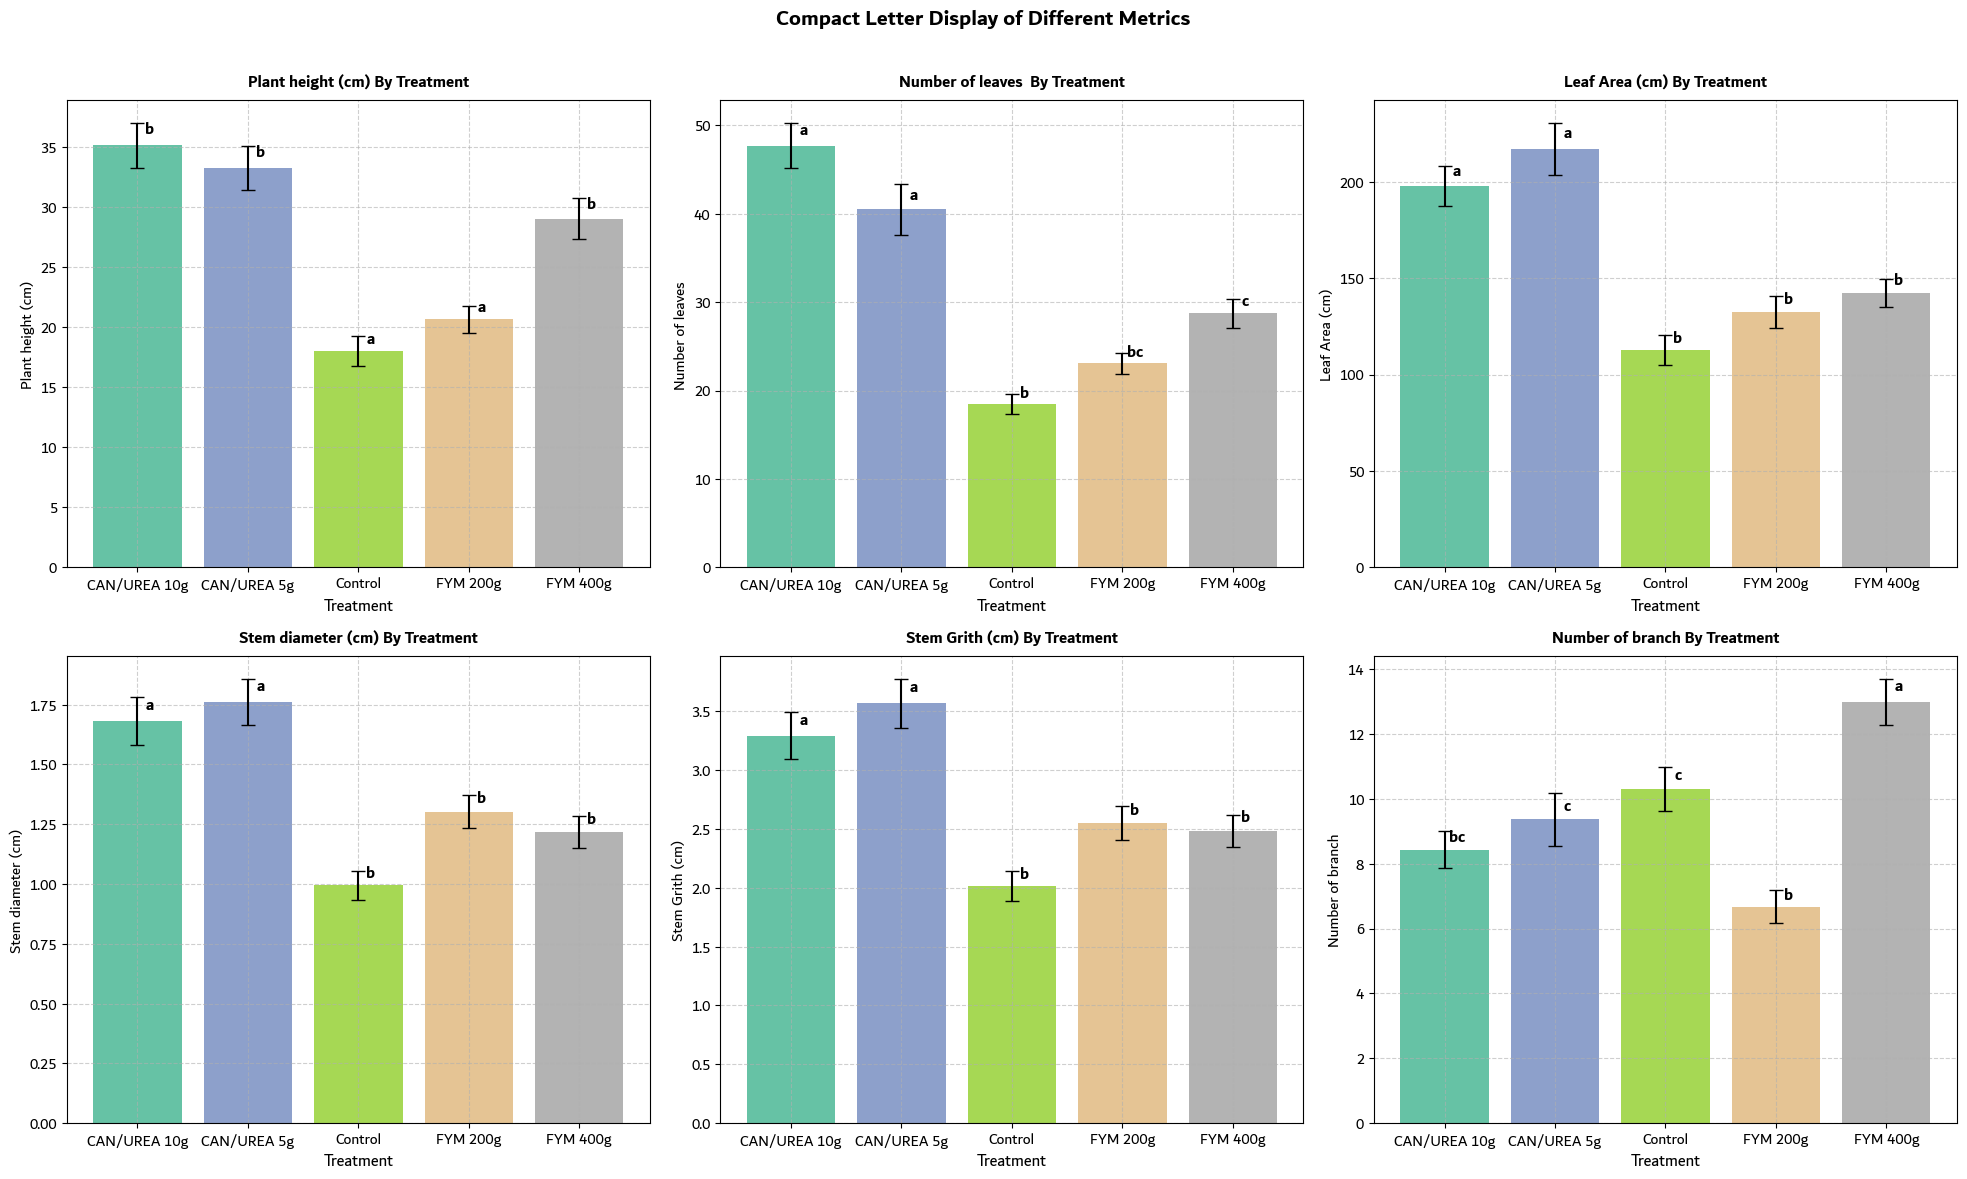

In [63]:
def compact_letter_visualizations(df, Metrics, group='Treatment', savepath=None):
    df[Metrics].columns = df[Metrics].columns.to_series().apply(rename)
    num_variables = len(Metrics)
    cols = min(num_variables, 3)
    rows = math.ceil(num_variables / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6.6*cols, 6*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("Compact Letter Display of Different Metrics", fontsize=16, fontweight="bold")
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, col in enumerate(Metrics):
        Turkey = pairwise_tukeyhsd(df[col], groups=df[group])
        Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
        group_labels = letters(Turkeyresults)
        Aggregate_df = df.groupby(group)[col].agg(["mean", "sem"]).reset_index()
        ax = axes[idx]

        error = np.full(len(Aggregate_df), Aggregate_df["sem"])
        colors = plt.cm.Set2(np.linspace(0, 1, len(Aggregate_df)))
        bars = ax.bar(Aggregate_df[group], Aggregate_df["mean"], yerr=error, color=colors, capsize=5)
        for bar, Letters in zip(bars, Aggregate_df[group]):
            height = bar.get_height()
            offset = height * 0.02
            ax.annotate(group_labels[Letters],
                        xy=(bar.get_x() + bar.get_width() / 2, height + offset),
                        xytext=(9, 0),
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=12, fontweight="bold")
    
        
        ax.set_xticks(range(len(Aggregate_df[group])))
        ax.set_xticklabels(Aggregate_df[group], rotation=0, ha="center")
        ax.set_xlabel(group, fontsize=12)
        ax.set_ylabel(col, fontsize=11)
        ax.set_title(f"{col} By {group.title()}", fontsize=12, fontweight="bold", pad=10)
        ax.grid(linestyle="--", alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath: plt.savefig(savepath)
    plt.show()

Metrics = ['Plant height (cm)', 'Number of leaves ', 'Leaf Area (cm)', 'Stem diameter (cm)', 'Stem Grith (cm)', 'Number of branch']
compact_letter_visualizations(df, Metrics, group='Treatment', savepath=None)

<h1 style='font-size: 20px; color: crimson; font-family: Colonna MT; font-weight: 600'>5.0: Conclusion</h1>


In conclusion, this analysis demonstrates how to compute compact letter displays (CLDs) to effectively summarize and present group comparisons. By formatting the results into structured tables and visualizing them for a more detailed interpretation, the approach provides clarity and insight into the data. The aim of this method is to streamline the work process by presenting the outcomes in an easily understandable format.

---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

---

<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![X (Twitter)](https://img.shields.io/badge/X-@Jabulente-black?logo=x)](https://x.com/Jabulente)  [![Instagram](https://img.shields.io/badge/Instagram-@Jabulente-purple?logo=instagram)](https://instagram.com/Jabulente)  [![Threads](https://img.shields.io/badge/Threads-@Jabulente-black?logo=threads)](https://threads.net/@Jabulente)  [![TikTok](https://img.shields.io/badge/TikTok-@Jabulente-teal?logo=tiktok)](https://tiktok.com/@Jabulente)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

</div>

<h5 style='font-size: 65px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>